In [3]:
from tensorflow.keras.models import load_model
model = load_model('/content/sample_data/brain_tumor_model.h5')

In [15]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

class_labels = ['meningioma', 'glioma', 'notumor', 'pituitary']

def detect_and_display(img_path, model, image_size=128):

    try:
        #load and preprocess
        img = load_img(img_path, target_size=(image_size, image_size))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        #make prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        confidence_score = np.max(predictions, axis=1)[0]

        #determine the class
        if class_labels[predicted_class_index] == 'notumor':
            result = "No Tumor"
        else:
            result = f"Tumor: {class_labels[predicted_class_index]}"

        #display the image
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


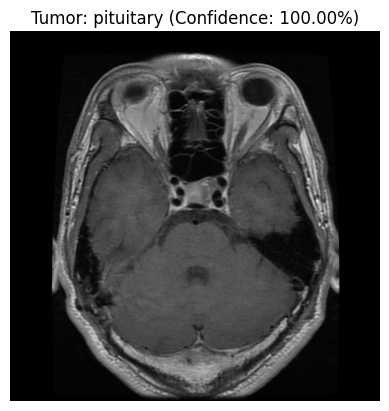

In [16]:
#example
image_path = '/content/drive/MyDrive/Brain Tumor /Testing/pituitary/Te-piTr_0000.jpg'
detect_and_display(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


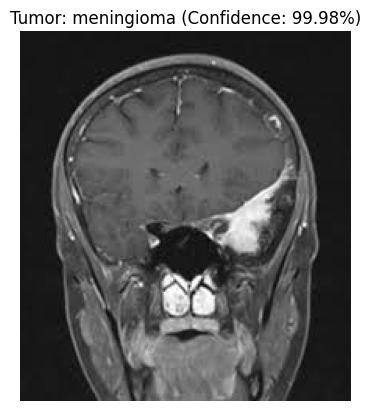

In [18]:
#example
image_path = '/content/drive/MyDrive/Brain Tumor /Testing/meningioma/Te-meTr_0003.jpg'
detect_and_display(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


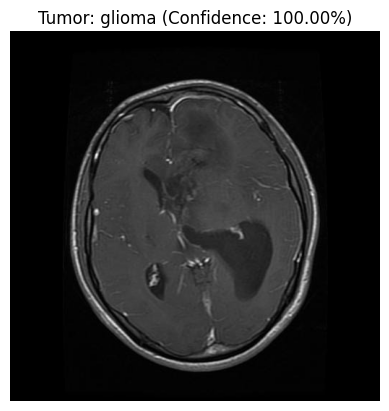

In [22]:
#example
image_path = '/content/drive/MyDrive/Brain Tumor /Testing/glioma/Te-glTr_0009.jpg'
detect_and_display(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


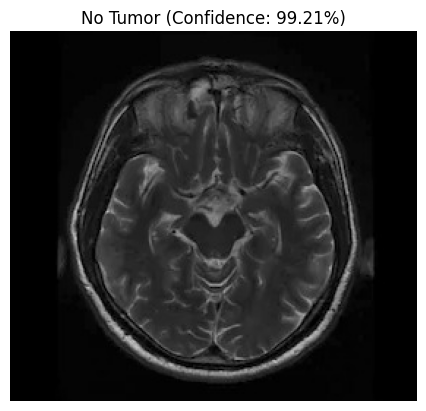

In [21]:
#example
image_path = '/content/drive/MyDrive/Brain Tumor /Testing/notumor/Te-noTr_0006.jpg'
detect_and_display(image_path, model)